In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import FinanceDataReader as fdr

In [3]:
samsung = fdr.DataReader('008770')

In [4]:
ford = fdr.DataReader('008770','2017-01-02','2022-07-08')

In [5]:
ford.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=1356, freq=None)

In [6]:
ford.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=1356, freq=None)

In [7]:
Stock_code = '008770'
stock = fdr.DataReader(Stock_code, '2017-01-02','2022-07-08')

In [8]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,47550,47700,47150,47450,204335,-0.014538
2017-01-03,47400,47900,47200,47200,179991,-0.005269
2017-01-04,47050,47600,47050,47500,141656,0.006356
2017-01-05,47600,48600,47250,48400,308502,0.018947
2017-01-06,48400,48550,48000,48550,182143,0.003099


In [9]:
stock.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=1356, freq=None)

In [10]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

Text(0, 0.5, 'price')

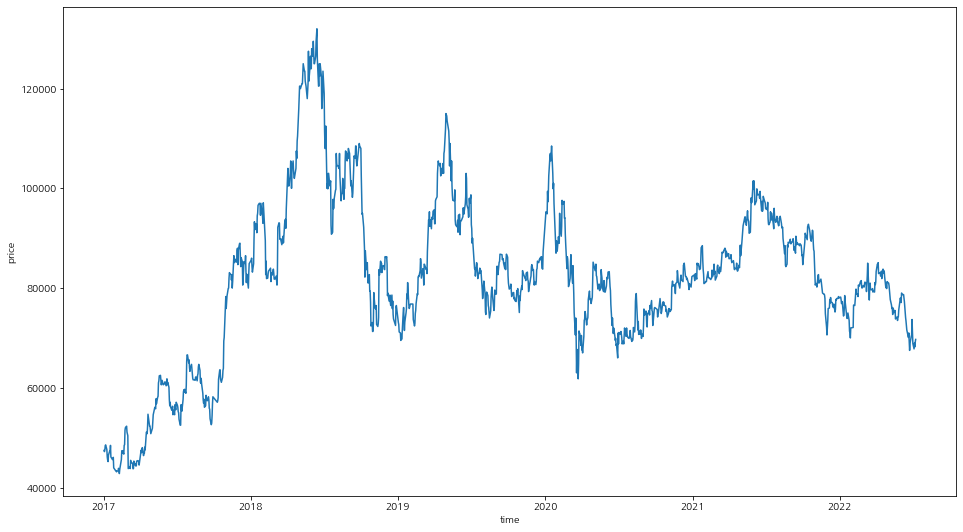

In [11]:
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.05800335, 0.04745763, 0.05844907, 0.05213004, 0.02869511],
       [0.05633017, 0.04971751, 0.05902778, 0.04932735, 0.02165778],
       [0.0524261 , 0.04632768, 0.05729167, 0.05269058, 0.01057595],
       ...,
       [0.29949805, 0.29830508, 0.29861111, 0.28475336, 0.02365878],
       [0.29503625, 0.29491525, 0.30555556, 0.29596413, 0.        ],
       [0.30284439, 0.3039548 , 0.31365741, 0.30156951, 0.00519359]])

In [13]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)


In [16]:
x_train.shape, y_train.shape


((1084, 4), (1084,))

In [17]:
x_test.shape, y_test.shape


((272, 4), (272,))

In [18]:
x_train


,Open,High,Low,Volume
0,0.058003,0.047458,0.058449,0.028695
1,0.056330,0.049718,0.059028,0.021658
2,0.052426,0.046328,0.057292,0.010576
3,0.058561,0.057627,0.059606,0.058808
4,0.067485,0.057062,0.068287,0.022280
...,...,...,...,...
1079,0.621863,0.632768,0.633102,0.238107
1080,0.620747,0.628249,0.634259,0.116091
1081,0.633017,0.672316,0.648148,0.316450
1082,0.659788,0.655367,0.662037,0.189195


In [19]:
import test11 as ts
import imp
imp.reload(ts)

<module 'test11' from 'c:\\Users\\김성휘\\Desktop\\공모전데이터\\test11.py'>

In [20]:
df = ts.LSTM('008770')

In [21]:
df

,Open,High,Low,Volume
0,0.011156,0.010583,0.011450,0.017246
1,0.009789,0.009713,0.010183,0.019329
2,0.009109,0.009915,0.009275,0.025165
3,0.009584,0.010245,0.009973,0.019422
4,0.010951,0.012199,0.010325,0.050769
...,...,...,...,...
4795,0.422472,0.420217,0.426386,0.051167
4796,0.422472,0.420935,0.433135,0.030822
4797,0.427590,0.425246,0.431635,0.048837
4798,0.421741,0.424528,0.431635,0.045257


In [22]:
ho = pd.read_csv("./csv/호텔신라공매도거래1722.csv", encoding='CP949')
ho2 = pd.read_csv("./csv/호텔신라공매도잔고1722.csv", encoding='CP949')

In [23]:
ho2.drop(["수량_상장주식수","금액_공매도잔고금액","금액_시가총액"], axis=1, inplace=True)

In [24]:
ho2

,일자,수량_공매도잔고수량,비중
0,2022/07/08,2841061,7.24
1,2022/07/07,2852905,7.27
2,2022/07/06,2851481,7.27
3,2022/07/05,2859280,7.29
4,2022/07/04,2896948,7.38
...,...,...,...
1351,2017/01/06,2741912,6.99
1352,2017/01/05,2788550,7.10
1353,2017/01/04,2820774,7.19
1354,2017/01/03,2828097,7.21


In [25]:
ho.drop(["수량_공매도거래량_업틱룰적용","수량_공매도거래량_업틱룰예외","수량_거래량","금액_공매도거래대금_업틱룰적용","금액_공매도거래대금_업틱룰예외","금액_거래대금"], axis=1, inplace=True)

In [26]:
ho_total = pd.merge(ho,ho2,on="일자", how="inner")

In [27]:
ho_total.sort_index( ascending=False, ignore_index=True)

,일자,수량_공매도거래량_전체,수량_비중,금액_공매도거래대금_전체,금액_비중,수량_공매도잔고수량,비중
0,2017/01/02,50295,24.61,2378629100,24.58,2795914,7.12
1,2017/01/03,51307,28.51,2427997250,28.49,2828097,7.21
2,2017/01/04,30603,21.60,1449158200,21.61,2820774,7.19
3,2017/01/05,23029,7.46,1108885350,7.45,2788550,7.10
4,2017/01/06,13614,7.47,658551250,7.48,2741912,6.99
...,...,...,...,...,...,...,...
1351,2022/07/04,48680,19.38,3293571100,19.39,2896948,7.38
1352,2022/07/05,29358,17.39,2020524800,17.37,2859280,7.29
1353,2022/07/06,29013,15.52,1997046500,15.49,2851481,7.27
1354,2022/07/07,13576,12.92,937263100,12.92,2852905,7.27


In [28]:
ho_total.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355],
           dtype='int64', length=1356)

In [29]:
ho_total["일자"] = pd.to_datetime(ho_total["일자"])

In [30]:
ho_total

,일자,수량_공매도거래량_전체,수량_비중,금액_공매도거래대금_전체,금액_비중,수량_공매도잔고수량,비중
0,2022-07-08,6120,4.97,427100100,4.97,2841061,7.24
1,2022-07-07,13576,12.92,937263100,12.92,2852905,7.27
2,2022-07-06,29013,15.52,1997046500,15.49,2851481,7.27
3,2022-07-05,29358,17.39,2020524800,17.37,2859280,7.29
4,2022-07-04,48680,19.38,3293571100,19.39,2896948,7.38
...,...,...,...,...,...,...,...
1351,2017-01-06,13614,7.47,658551250,7.48,2741912,6.99
1352,2017-01-05,23029,7.46,1108885350,7.45,2788550,7.10
1353,2017-01-04,30603,21.60,1449158200,21.61,2820774,7.19
1354,2017-01-03,51307,28.51,2427997250,28.49,2828097,7.21


In [31]:
ho_total.columns = ["Date", "공매도거래량", "공매도거래량비중", "공매도거래대금", "공매도거래대금비중", "공매도잔고수량", "공매도잔고비중"]

In [32]:
ho_total

,Date,공매도거래량,공매도거래량비중,공매도거래대금,공매도거래대금비중,공매도잔고수량,공매도잔고비중
0,2022-07-08,6120,4.97,427100100,4.97,2841061,7.24
1,2022-07-07,13576,12.92,937263100,12.92,2852905,7.27
2,2022-07-06,29013,15.52,1997046500,15.49,2851481,7.27
3,2022-07-05,29358,17.39,2020524800,17.37,2859280,7.29
4,2022-07-04,48680,19.38,3293571100,19.39,2896948,7.38
...,...,...,...,...,...,...,...
1351,2017-01-06,13614,7.47,658551250,7.48,2741912,6.99
1352,2017-01-05,23029,7.46,1108885350,7.45,2788550,7.10
1353,2017-01-04,30603,21.60,1449158200,21.61,2820774,7.19
1354,2017-01-03,51307,28.51,2427997250,28.49,2828097,7.21


In [33]:
hosin = pd.merge(stock,ho_total, on="Date", how="inner")

In [34]:
hosin["Open2"] = (((hosin["Open"]-hosin["Open"].shift(1)) / hosin["Open"].shift(1))*100).fillna(0)
hosin["High2"] = (((hosin["High"]-hosin["High"].shift(1)) / hosin["High"].shift(1))*100).fillna(0)
hosin["Low2"] = (((hosin["Low"]-hosin["Low"].shift(1)) / hosin["Low"].shift(1))*100).fillna(0)
hosin["Close2"] = (((hosin["Close"]-hosin["Close"].shift(1)) / hosin["Close"].shift(1))*100).fillna(0)
hosin["gong_g2"] = round(((hosin["공매도거래량"]-hosin["공매도거래량"].shift(1)) / hosin["공매도거래량"].shift(1))*100, 4).fillna(0)

hosin["gong_gd2"] = round(((hosin["공매도거래대금"]-hosin["공매도거래대금"].shift(1)) / hosin["공매도거래대금"].shift(1))*100, 4).fillna(0)

hosin["gong_j2"] = round(((hosin["공매도잔고수량"]-hosin["공매도잔고수량"].shift(1)) / hosin["공매도잔고수량"].shift(1))*100, 4).fillna(0)


In [35]:
hosin.drop(["Year","Month","Day"],axis=1, inplace=True)

In [36]:
hosin

,Date,Open,High,Low,Close,Volume,Change,공매도거래량,공매도거래량비중,공매도거래대금,공매도거래대금비중,공매도잔고수량,공매도잔고비중,Open2,High2,Low2,Close2,gong_g2,gong_gd2,gong_j2
0,2017-01-02,47550,47700,47150,47450,204335,-0.014538,50295,24.61,2378629100,24.58,2795914,7.12,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000
1,2017-01-03,47400,47900,47200,47200,179991,-0.005269,51307,28.51,2427997250,28.49,2828097,7.21,-0.315457,0.419287,0.106045,-0.526870,2.0121,2.0755,1.1511
2,2017-01-04,47050,47600,47050,47500,141656,0.006356,30603,21.60,1449158200,21.61,2820774,7.19,-0.738397,-0.626305,-0.317797,0.635593,-40.3532,-40.3147,-0.2589
3,2017-01-05,47600,48600,47250,48400,308502,0.018947,23029,7.46,1108885350,7.45,2788550,7.10,1.168969,2.100840,0.425080,1.894737,-24.7492,-23.4807,-1.1424
4,2017-01-06,48400,48550,48000,48550,182143,0.003099,13614,7.47,658551250,7.48,2741912,6.99,1.680672,-0.102881,1.587302,0.309917,-40.8832,-40.6114,-1.6725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,2022-07-04,68700,69300,66500,67800,251171,-0.015965,48680,19.38,3293571100,19.39,2896948,7.38,-3.511236,-2.668539,-3.061224,-1.596517,-42.7058,-43.8199,0.3857
1352,2022-07-05,68000,69800,67900,69000,168847,0.017699,29358,17.39,2020524800,17.37,2859280,7.29,-1.018923,0.721501,2.105263,1.769912,-39.6919,-38.6525,-1.3003
1353,2022-07-06,69200,69900,67900,68200,186913,-0.011594,29013,15.52,1997046500,15.49,2851481,7.27,1.764706,0.143266,0.000000,-1.159420,-1.1751,-1.1620,-0.2728
1354,2022-07-07,68800,69600,68500,69200,105071,0.014663,13576,12.92,937263100,12.92,2852905,7.27,-0.578035,-0.429185,0.883652,1.466276,-53.2072,-53.0675,0.0499


In [40]:
hosin["gong_g2"]

0        0.0000
1        2.0121
2      -40.3532
3      -24.7492
4      -40.8832
         ...   
1351   -42.7058
1352   -39.6919
1353    -1.1751
1354   -53.2072
1355   -54.9204
Name: gong_g2, Length: 1356, dtype: float64

In [41]:
hosin["gong_g2"]= hosin["gong_g2"].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open','High','Low','Close','Volume','공매도거래량','공매도거래량비중','공매도거래대금','공매도거래대금비중','공매도잔고수량','공매도잔고비중','Open2', 'High2', 'Low2', 'Volume','gong_g2']
# 스케일 후 columns
scaled = scaler.fit_transform(hosin[scale_cols])
scaled

ValueError: Input contains infinity or a value too large for dtype('float64').

In [112]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [114]:
import tensorflow as tf

In [115]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [116]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [117]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [118]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [120]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [121]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [122]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                            save_weights_only=True, 
                            save_best_only=True, 
                            monitor='val_loss', 
                            verbose=1)

In [123]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
34/34 [==============================] - 3s 25ms/step - loss: 0.0441 - mse: 0.0881 - val_loss: 0.0030 - val_mse: 0.0061

Epoch 00001: val_loss improved from inf to 0.00303, saving model to tmp\ckeckpointer.ckpt
Epoch 2/50
34/34 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0073 - val_loss: 8.6306e-04 - val_mse: 0.0017

Epoch 00002: val_loss improved from 0.00303 to 0.00086, saving model to tmp\ckeckpointer.ckpt
Epoch 3/50
34/34 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0047 - val_loss: 9.3321e-04 - val_mse: 0.0019

Epoch 00003: val_loss did not improve from 0.00086
Epoch 4/50
34/34 [==============================] - 1s 18ms/step - loss: 0.0017 - mse: 0.0034 - val_loss: 6.2084e-04 - val_mse: 0.0012

Epoch 00004: val_loss improved from 0.00086 to 0.00062, saving model to tmp\ckeckpointer.ckpt
Epoch 5/50
34/34 [==============================] - 1s 13ms/step - loss: 0.0014 - mse: 0.0028 - val_loss: 5.8637e-04 - val_mse: 0.001

In [124]:
model.load_weights(filename)

In [125]:
pred = model.predict(test_data)

In [126]:
pred.shape

(252, 1)

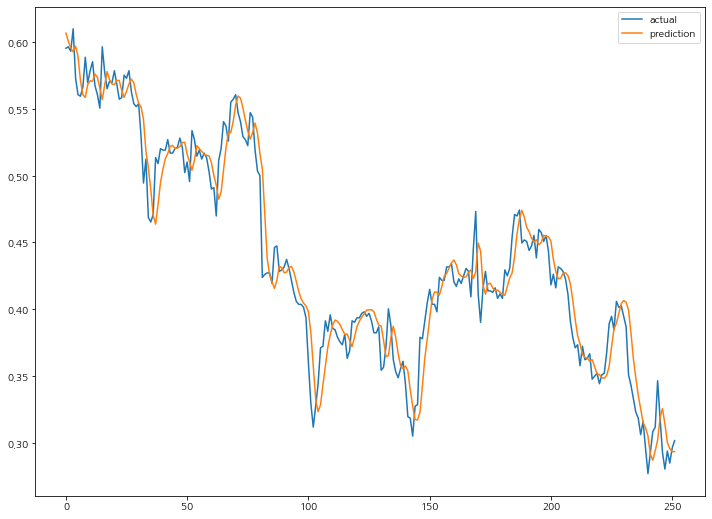

In [127]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()